<a href="https://colab.research.google.com/github/Supriyo-I/LGMVIP-DataScience-Task-5/blob/main/terrorprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import os

In [22]:
path="/content/terror.csv"
terror = pd.read_csv(path, encoding = "ISO-8859-1",error_bad_lines=False)


Skipping line 3431: expected 135 fields, saw 161

Skipping line 5130: expected 135 fields, saw 203

Skipping line 9657: expected 135 fields, saw 159
Skipping line 11961: expected 135 fields, saw 149

Skipping line 21142: expected 135 fields, saw 175

Skipping line 25735: expected 135 fields, saw 198

Skipping line 30310: expected 135 fields, saw 222



In [23]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [24]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [25]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [26]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [27]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            170
Region             1
city               3
latitude        1781
longitude       1782
AttackType         3
Killed          7111
Wounded         9031
Target           422
Summary        35795
Group              9
Target_type        3
Weapon_type        8
Motive         36069
dtype: int64

In [28]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36965 entries, 0 to 36964
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         36965 non-null  int64  
 1   Month        36965 non-null  int64  
 2   Day          36965 non-null  int64  
 3   Country      36965 non-null  object 
 4   state        36795 non-null  object 
 5   Region       36964 non-null  object 
 6   city         36962 non-null  object 
 7   latitude     35184 non-null  object 
 8   longitude    35183 non-null  float64
 9   AttackType   36962 non-null  object 
 10  Killed       29854 non-null  object 
 11  Wounded      27934 non-null  object 
 12  Target       36543 non-null  object 
 13  Summary      1170 non-null   object 
 14  Group        36956 non-null  object 
 15  Target_type  36962 non-null  object 
 16  Weapon_type  36957 non-null  object 
 17  Motive       896 non-null    object 
dtypes: float64(1), int64(3), object(14)
memory usa

In [29]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())


Country with the most attacks: El Salvador
City with the most attacks: San Salvador
Region with the most attacks: Western Europe
Year with the most attacks: 1980
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


In [30]:
terror['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     739
1976     923
1977    1948
1978    3052
1979    5323
1980    5323
1981    5172
1982    3961
1983    2869
1984    3494
1985    1415
1986       2
Name: Year, dtype: int64

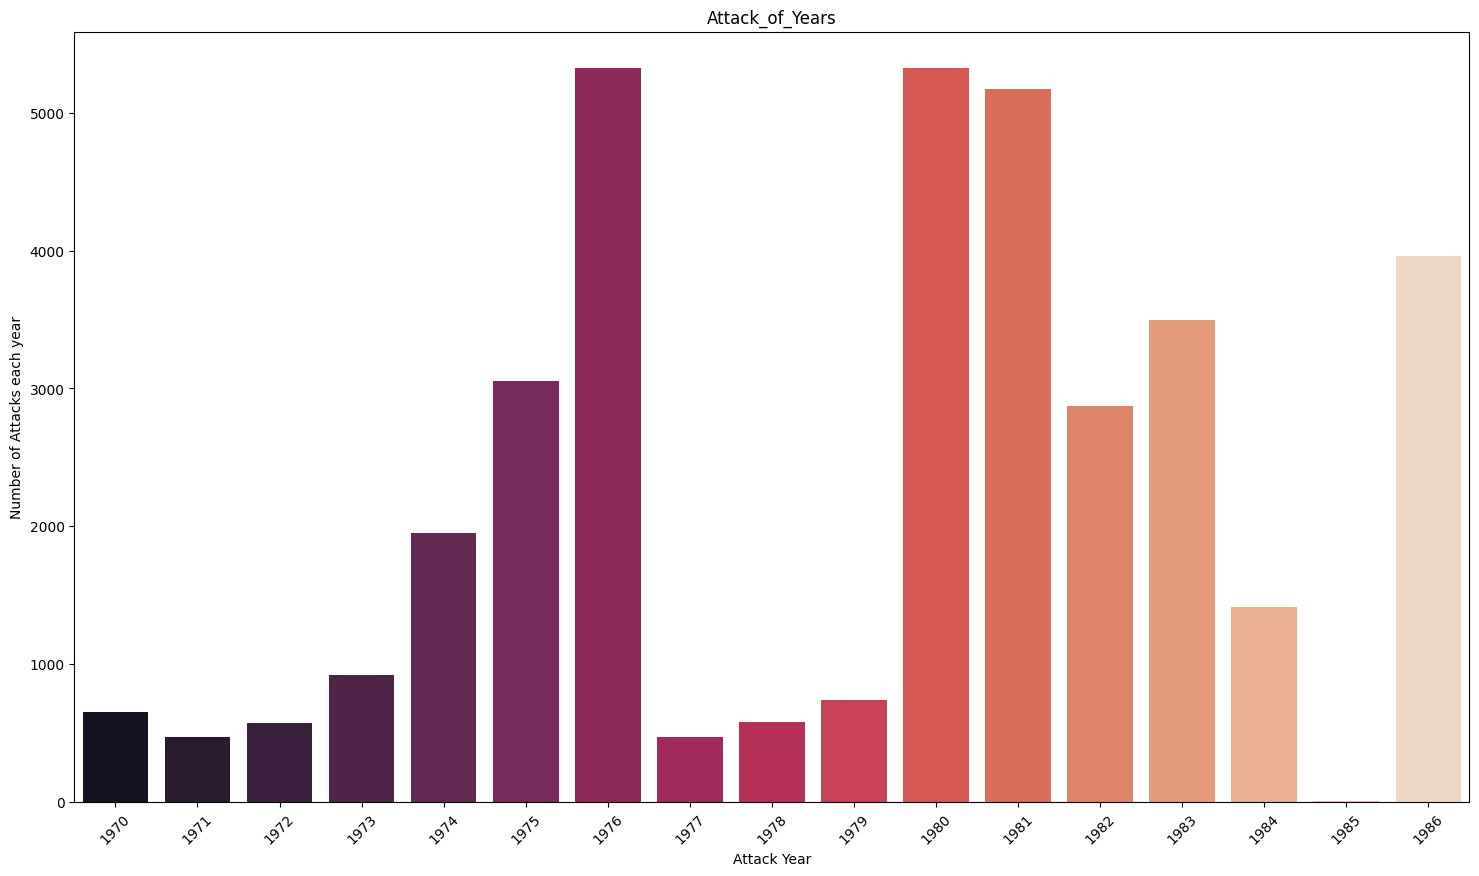

In [31]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

Skipping line 3431: expected 135 fields, saw 161

Skipping line 5130: expected 135 fields, saw 203

Skipping line 9657: expected 135 fields, saw 159
Skipping line 11961: expected 135 fields, saw 149

Skipping line 21142: expected 135 fields, saw 175

Skipping line 25735: expected 135 fields, saw 198

Skipping line 30310: expected 135 fields, saw 222



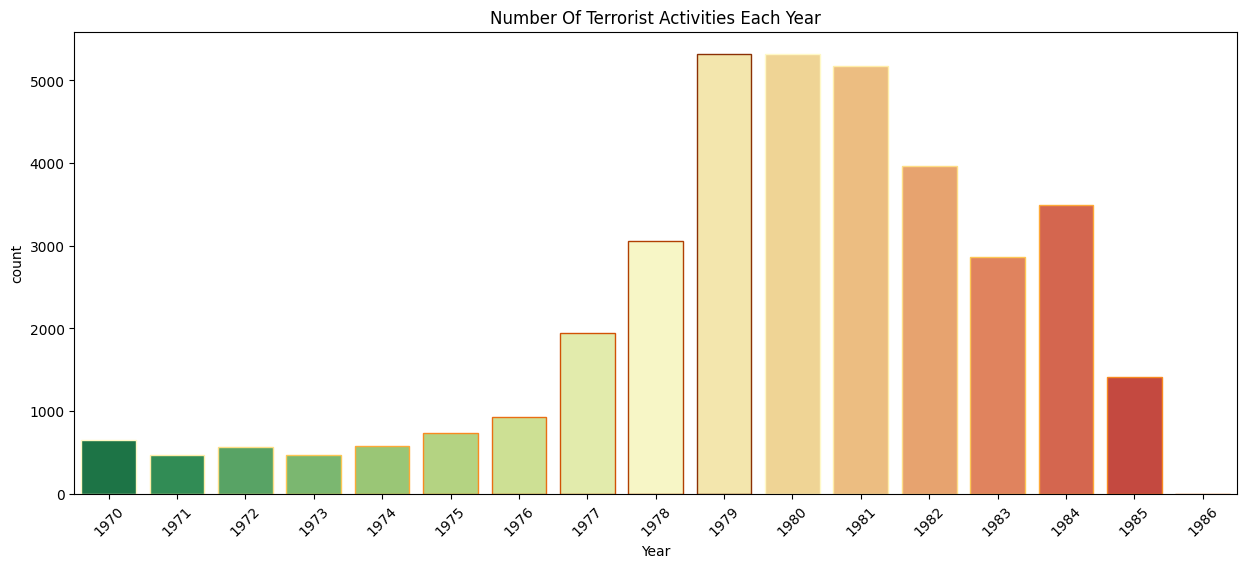

In [54]:
plt.subplots(figsize=(15,6))
data=pd.read_csv("terror.csv",encoding = "ISO-8859-1",error_bad_lines=False)
sns.countplot(x='Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

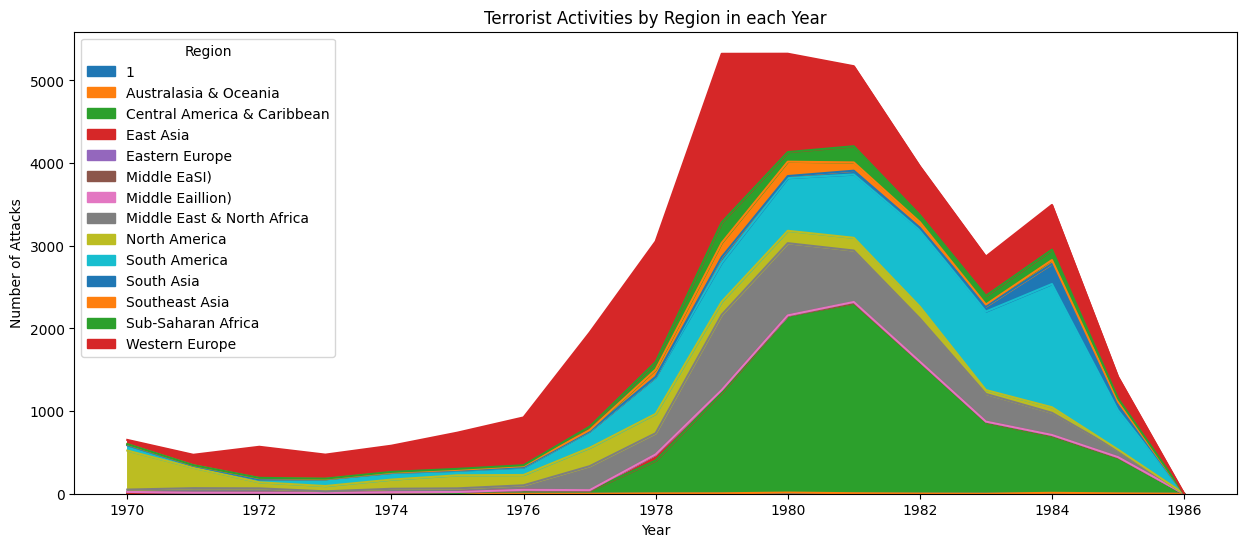

In [33]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [73]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

ValueError: ignored

In [59]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year
Country
Argentina
Colombia
El Salvador
France
Guatemala


In [58]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [62]:
terror.Country.value_counts()[:15]

El Salvador       5327
United Kingdom    3093
Spain             2575
Guatemala         2436
Colombia          2417
Peru              2232
United States     2221
Italy             2093
Nicaragua         1537
France            1521
Lebanon           1159
Chile             1051
Turkey             984
Israel             771
Iran               712
Name: Country, dtype: int64

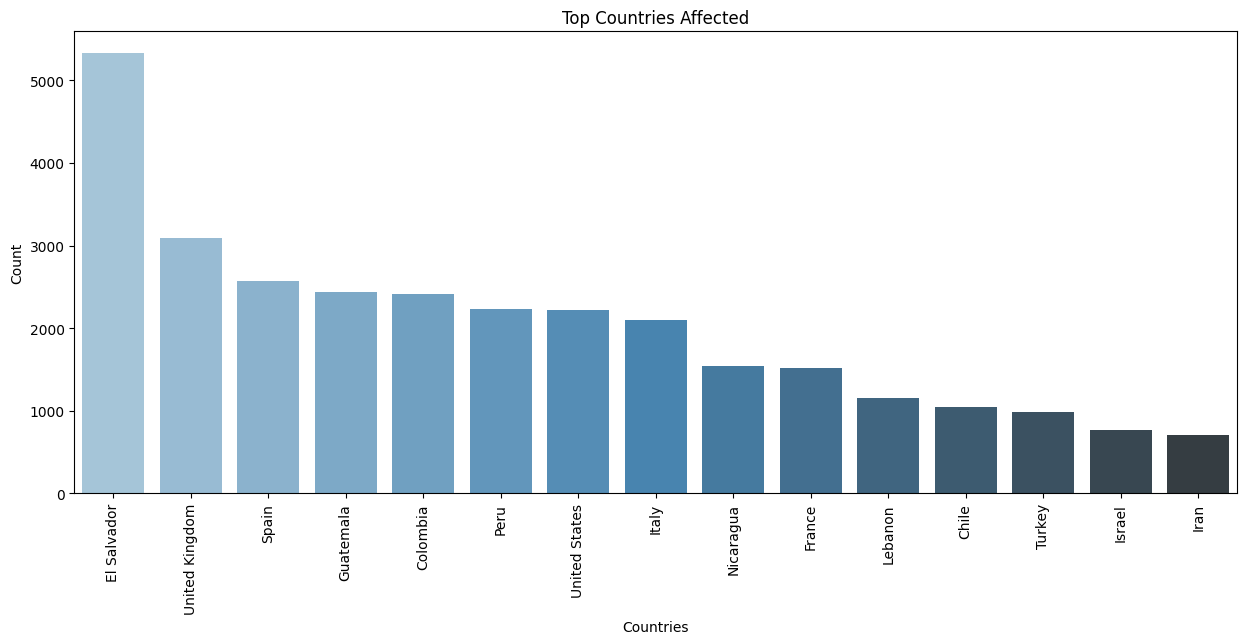

In [66]:
plt.subplots(figsize=(15,6))
sns.barplot(x=terror['Country'].value_counts()[:15].index,y=terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [68]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 1970

In [70]:
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [71]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map


In [72]:
terror.Group.value_counts()[1:15]

Irish Republican Army (IRA)                           2149
Farabundo Marti National Liberation Front (FMLN)      1836
Shining Path (SL)                                     1703
Basque Fatherland and Freedom (ETA)                   1555
Palestinians                                           785
Revolutionary Armed Forces of Colombia (FARC)          646
M-19 (Movement of April 19)                            576
Nicaraguan Democratic Force (FDN)                      526
Corsican National Liberation Front (FLNC)              436
Sandinista National Liberation Front (FSLN)            388
Red Brigades                                           363
Movement of the Revolutionary Left (MIR) (Chile)       350
People's Liberation Forces (FPL)                       332
Armenian Secret Army for the Liberation of Armenia     317
Name: Group, dtype: int64